<a href="https://colab.research.google.com/github/joshuajhchoi/ai2learn/blob/master/titanic_top_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Challenge

## 1. Import libraries & data  데이터준비 및 모듈 임포트

In [0]:
# They are for data manipulation/ 기본 데이터 정리 및 처리
import pandas as pd
import numpy as np

# For Visualization / 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# For preprocessing and ML algorithms / 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# Tunning and Evaluation / 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# Ignore warnings / 경고 제거 (Pandas often makes warnings)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

### CSV to DF

import modules -> import data -> turning data into data frame (pandas) 

* 이어서 이를 데이터프레임에 임포트하여 데이터셋이 판다스 데이터프레임에 임포트 되도록 합니다.
* Import the data into the dataframe so the dataset is converted as a pandas dataframe.

In [0]:
# This may be harder than expected for a firsttimer, but if the data was not delivered correctly from the copy, press "+ Add Data", load "Titanic Data" from "Competition Data", and click each file to check the path address.
# 이 것이 처음하는 사람에게 예상보다 어려울 수 있는데 복사한 것에서 데이터가 전달이 잘 안 되었다면 "+Add Data" 누르시고 'Competition Data'에서 "Titanic Data" 불러온 후 파일을 찍어서 경로 주소 확인해야 함 
test = pd.read_csv('../input/titanic/test.csv')
train = pd.read_csv('../input/titanic/train.csv')

# Now csv files, test and train, have become data frames.    

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [0]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
train.columns[3]

'Name'

In [0]:
train.columns[3:5]

Index(['Name', 'Sex'], dtype='object')

In [0]:
train[5:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [0]:
train.shape

(891, 12)

In [0]:
train.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 파일 분리 및 병합 (File Separations and Merges) 

* Secure the shape of ntrain and ntest. (Preparation for later splitting from the merged one)
* y_train is a known result.
* Separate the passenger ID of the test as it will be added to the final result later.
* Merge train and test to create a file called data. When you convert a string to a number, or group numbers by interval, it is easier for us to put them together to do it all at once.
* ntrain과 ntest의 shape을 확보해놓습니다. (병합 한 것을 나중에 다시 갈라 놓기 위한 준비)
* y_train은 알려진 결과 값이니 따로 모셔 놓고
* 테스트의 승객 아이디는 나중에 최종 결과에 넣을 것이기 때문에 따로 떼어 놓습니다.
* train과 test를 병합하여 data 란 파일을 만듭니다. 문자로 된 것을 숫자로 바꾼다든가.숫자를 인터발 별로 그룹화 한다든가 할 때 한꺼번에 하기 위해 합해 놓습니다.

In [0]:
# 병합 준비
ntrain = train.shape[0]
ntest = test.shape[0]

# 아래는 따로 잘 모셔 둡니다.
y_train = train['Survived'].values
passId = test['PassengerId']

# 병함 파일 만들기
data = pd.concat((train, test))

# 데이터 행과 열의 크기는
print("data size is: {}".format(data.shape))

data size is: (1309, 12)


In [0]:
train['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [0]:
train['Survived'].values


array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

## 3. Check the files / 파일을 보겠습니다.

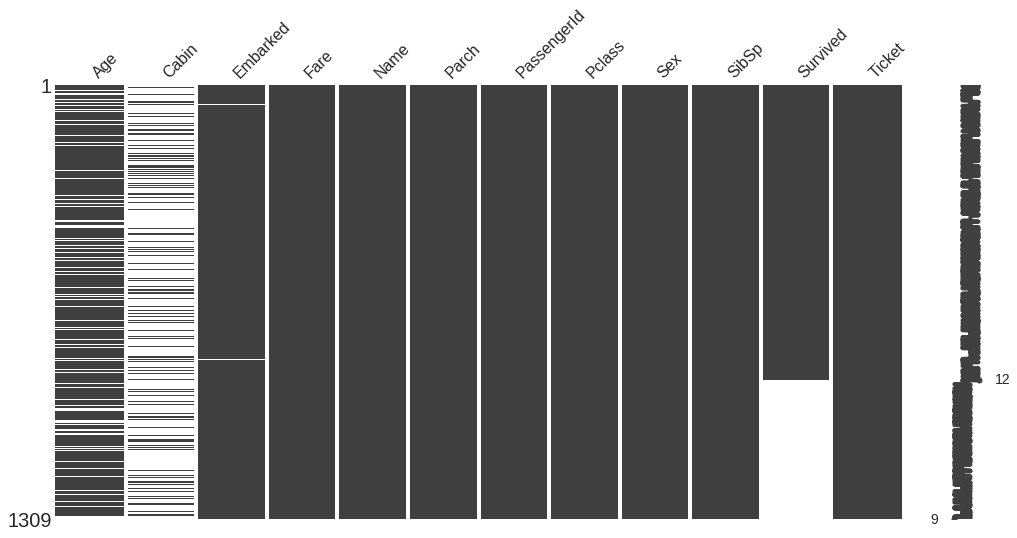

In [0]:
missingno.matrix(data, figsize = (15,8))

In [0]:
data.isnull().sum() #비어 있는 값들을 체크해 본다.

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [0]:
data.Age.isnull().any()

True

In [0]:
data.dtypes
#data.dtypes.isnull()
#data.dtypes.isnull().any()

Age            float64
Cabin           object
Embarked        object
Fare           float64
Name            object
Parch            int64
PassengerId      int64
Pclass           int64
Sex             object
SibSp            int64
Survived       float64
Ticket          object
dtype: object

* Names of columns / 열 이름을 보겠습니다.

In [0]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

## 4. Features 항목

#### 항목의 종류 There are many types of features.
* 범주형 항목 (Categorical Features)

범주형 변수는 둘 이상의 결과 요소가 있는 변수이며 해당 기능의 각 값을 범주별로 분류 할 수 있습니다. 예를 들어 성별은 두 가지 범주 (남성과 여성)의 범주 형 변수입니다. 이산형 변수(discrete variable) = 범주형 변수 (categorical variable) 의 하나로 명목 변수 norminal variable 라고도합니다.

Categorical variables are variables that have more than one result element, and each value of that function can be classified by category. For example, gender is a categorical variable in two categories (male and female). Discrete variable = It is one kind of categorical variable, and is also known as nominal variable .

* 데이터 셋에서 명목 항목 : Sex, Embark 이며 우리는 Name, Ticket 등을 이로 변환해야 할 것 같습니다. The nominal items in the data set are: Sex, Embark and we have to convert Name, Ticket, etc to numbers.

* Ordinal Variable :

순위 변수는 범주 형의 하나지만 그 차이점은 값 사이의 상대 순서(=서열) 또는 정렬이 가능하다는 것입니다.

Ordinal variables are one of the categorical types, but the difference is the relative order (= sequence) or sorting between the values.

데이터 셋에서 순위 항목 : PClass 이며 우리는 Cabin을 이 범주로 변환해서 사용해야 할 것 같습니다.

Ordinal variables in the data set: PClass and we think we should convert Cabin to this category.

* 연속형 항목 (Continuous Features):

서로 연속된 값을 가진 변수를 가진 항목이며 여기에서 우리는 연령을 대표적인 것으로 볼 수 있습니다.

This is an item with variables with continuous values, age is one good sample

Age, SipSp, Parch, Fare는 interval variable로 만들어 이에 적용해야 할 것 같습니다.

Age, SipSp, Parch, and Fare should be catgorized to the interval variable.

* Feature Information

          Variable        Definition                Key

          survival          Survival                    0 = No, 1 = Yes

          pclass          Ticket class                1 = 1st, 2 = 2nd, 3 = 3rd

          sex              Sex    

          Age              Age in years    

          sibsp              # of siblings / spouses aboard the Titanic    

          parch              # of parents / children aboard the Titanic    

          ticket          Ticket number    

          fare              Passenger fare    

          cabin              Cabin number    

          embarked          Port of Embarkation         C = Cherbourg, Q = Queenstown, S = Southampton

## 5. 데이터 탐구  Exploratory Data Analysis

* train파일 순서대로 데이터 파일의 열들을 봅니다. 
* Let's view the columns of the data file in the order in the train file.

![](https://1.bp.blogspot.com/-rBTabaGeOTo/XicYRmv9s7I/AAAAAAAAKts/WQDUpGJbv20xbAO8vfnOkqtbCHyme3zNQCLcBGAsYHQ/s640/grey%2Barea.png)

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 파일 각 열의 상관 관계를 보겠습니다.

Let's take a look at the correlation of each column in the file.

Co-relation 매트릭스는 seaborn에서 변수 간 상관 계수를 보여주는 표입니다. 표의 각 셀은 두 변수 간의 상관 관계를 보여줍니다. 상관 매트릭스는 고급 분석에 대한 입력 및 고급 분석에 대한 진단으로 데이터를 요약하는 데 사용됩니다. 참고: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

Co-relation matrix is a table showing the correlation coefficient between variables in seaborn. Each cell in the table shows a correlation between two variables. Correlation matrices are used to summarize data as input to advanced analysis and as diagnostics for advanced analysis. Note: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

아래 마스크 셋업은 0로 행렬을 상관 행렬과 같은 모양으로 만든 후 여기에 불리안 값을 넣고 이를 다시 True만 만듭니다.

The mask setup below makes a matrix that looks like a correlation matrix with zeros, then puts a Boolean value into it and makes it true.

triu 는 우측 상단 삼각행렬을 의미

triu means upper right triangle

annot= True는 각 셀에 숫자를 표시하라는 것이고, False는 하지 말라는 것이구요

annot = True means to display a number in each cell, False means oppposite. https://seaborn.pydata.org/generated/seaborn.heatmap.html

이어서 이를 heatmap으로 런칭합니다.

Then launch it as a heatmap.

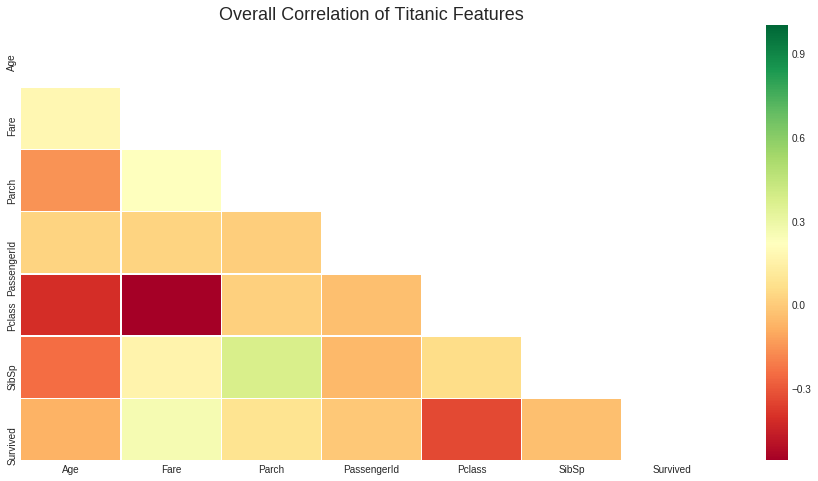

In [0]:
# Co-relation 매트릭스
corr = data.corr()
# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# 그래프 셋업
plt.figure(figsize=(14, 8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize=18)
#  Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.show()

* "Surived" 분석

한 열씩 검토해 보겠습니다.

We will look at the columns one by one

Survived - Key: (0 - Not Survived, 1- Survived)

Survived는 수자로 값을 주지만 Categorical Variable인 셈입니다.

죽던지 살던지 둘 중 하나의 값을 줍니다.

countplot을 그려 봅니다.

사이즈는 가로 10인치 세로 2인치

생존 여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령을 하는 것입니다.

pyplot(plt)의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트플롯을 그리라는 것입니다.

"Survived" gives a number, but it's a categorical variable.

Either Survived or Not Survived

Draw a countplot.

Size is 10 inches wide by 2 inches long

Survival counts

Use pyplot (plt) figure method to size the paint and draw a seaborn count plot.

0    549
1    342
Name: Survived, dtype: int64


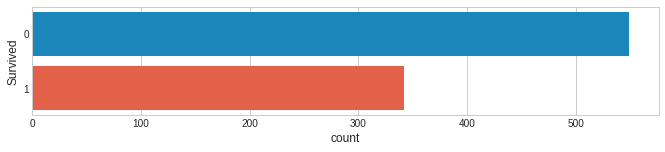

In [0]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived', data=train)
print(train.Survived.value_counts())

* 불행히도 사망자가 훨씬 많아 보입니다.
* 전체 사망자 비율을 좀 보겠습니다.
* 
* Unfortunately, there are more deaths than "survived".
* 
* Let's take a look at the overall rate.
* 파이그래프랑 카운트 플롯을 서브플롯으로 그립니다.
* 행은 하나 열은 2개의 서브 플롯입니다. 사이즈는 가로 15인치 세로 6인치
* 'Survived'의 값을 카운트해서 파이플롯을 만듭니다.
* explode는 폭발하는 것이니까 1이면 튀어 나가는 것인데 0을 주면 분리만 되고 돌출은 되지 않습니다. 이어서 0, 1인 것은 첫 번째 것은 아니고 두번 째 것은 분리된다는 의미로 생각하시면 됩니다.
* autopercent는 1.1이 표현하는 부분은 소수점 한 자리까지 보여 주라는 의미입니다. 뒤에 점 이하가 4면 둘 다 소수점 4자리수 까지 보여 줍니다.
* ax[0]은 첫번째 칸입니다.
* set_title 메소드는 서브 플롯의 제목을 보여 줍니다.
* 
* Draw a pie chart and count plot in the subplot parts.
* 
* Two rows and one column. Size : 15 inches wide by 6 inches high
* Create a pieplot by counting the value of 'Survived'.
* Explode means "protrusion", so if it's 1, it's popping out. 0 and 1 means that the second one is poping out.
* Autopercent means 1.1 shows up to one decimal place. If there is 4 after the dot, both show up to four decimal places.
* ax [0] is the first cell.
* The set_title method displays the title of the subplot.

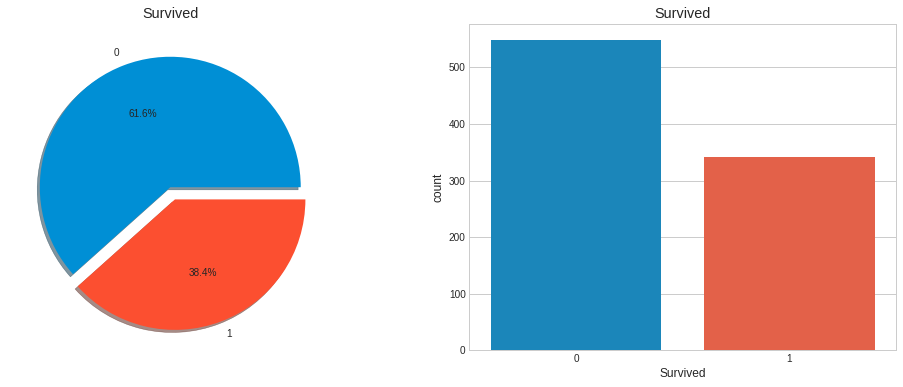

In [0]:
f,ax=plt.subplots(1,2,figsize=(15,6))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

* 위의 것을 아래와 같이 함수로 만들겠습니다. (물론 자주 쓰이지는 않겠지만 연습이니)
* Let's make the above as a function. (it's not going to be used often, but it's a practice for making a function)

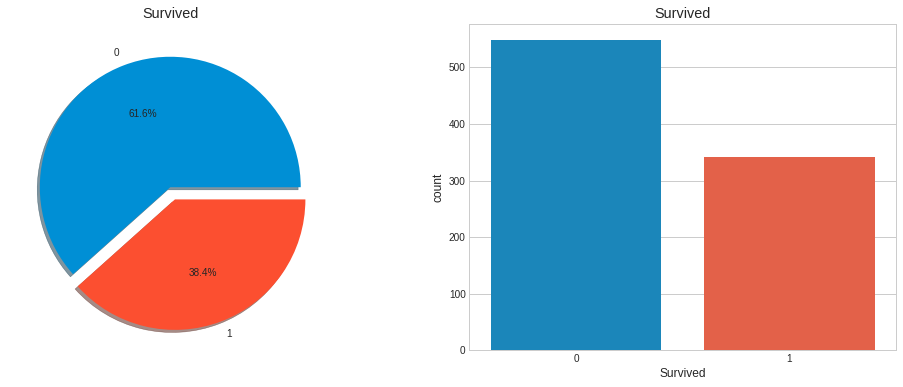

In [0]:
def piecount(a):
    f,ax=plt.subplots(1,2,figsize=(15,6))
    train[a].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title(a)
    ax[0].set_ylabel('')
    sns.countplot(a,data=train,ax=ax[1])
    ax[1].set_title(a)
    plt.show()

piecount('Survived')

* Let's make another version with 3 features involved. 3개 항목으로 

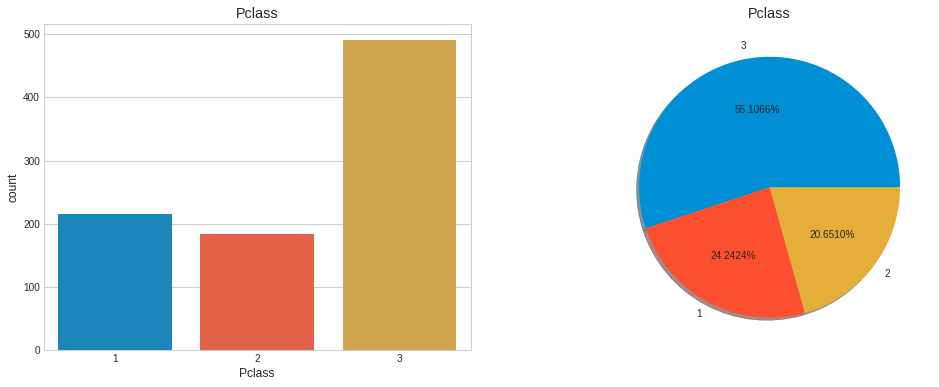

In [0]:
def piecount3(a):
      f,ax=plt.subplots(1,2,figsize=(15,6))
      train[a].value_counts().plot.pie(explode=[0,0.0,0],autopct='%0.4f%%',ax=ax[1],shadow=True)
      ax[1].set_title(a)
      ax[1].set_ylabel('')
      sns.countplot(a,data=train,ax=ax[0])
      ax[0].set_title(a)
      plt.show()

piecount3("Pclass")

* "Pclass" 분석

* Pclass는 값이 숫자이나 서열이 정해진 Ordinal Feature이다.
* Pclass is an "Ordinal Feature" whose values are numerical but sequenced.
* Key:1 = 1st, 2= 2nd, 3 = 3rd
* 
* 각 클래스 당 생존자를 보겠습니다.
* * Let's look at the survivors for each class.

In [0]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [0]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


* 1등급 객실의 사람들은 생존자가 더 많고, 2등급은 생존자에 비해 사망자가 조금 더 많으나, 3등급은 사망자가 3배 이상 많다는 것을 알 수 있습니다.
* The 1st class cabin has more survivors, the 2nd class has a few more deaths than the survivors, but the 3rd class has three times more deaths.

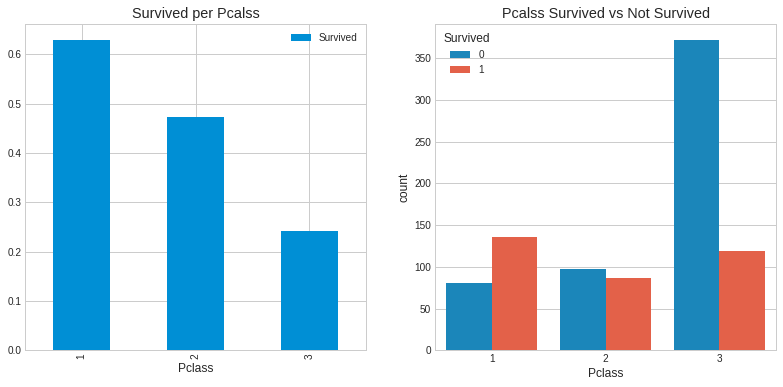

In [0]:
f,ax=plt.subplots(1,2,figsize=(12,6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pcalss')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1])
ax[1].set_title('Pcalss Survived vs Not Survived')
plt.show()

* 위에 만든 함수를 한 번 써 먹어 볼까요?
* Let's use a function we made above.

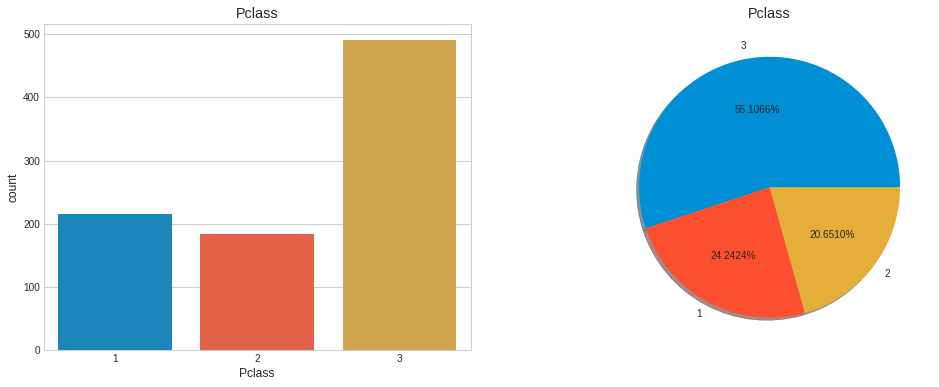

In [0]:
piecount3("Pclass")

* %는 3등칸이 반이 넘으나 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있습니다.
* 각 클래스 당 생존률을 볼까요?
* Let's look at the survival rate for each class?

In [0]:
train.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

#### "Name" 분석
* 이름은 거의 모두 다를 가능성이 큽니다. Family Name, First Name, Middle Name and even Dr. Capt, master and so on 모두 감안하면...
* 분류를 한 번 해 봅니다.
* 리스트를 한 번 주 욱 보겠습니다.
* The names are most likely different...all of them . Family Name, First Name, Middle Name and even Dr. Given Capt, Master and so on ...
* Try to classify them.
* Let's look at the list once.

In [0]:
data.Name.value_counts()

Connolly, Miss. Kate                2
Kelly, Mr. James                    2
Cor, Mr. Liudevit                   1
Reynaldo, Ms. Encarnacion           1
Richards, Master. William Rowe      1
                                   ..
Finoli, Mr. Luigi                   1
Hewlett, Mrs. (Mary D Kingcome)     1
Banfield, Mr. Frederick James       1
Mionoff, Mr. Stoytcho               1
Herman, Mrs. Samuel (Jane Laver)    1
Name: Name, Length: 1307, dtype: int64

* 이름은 언뜻 보아서 감이 안 옵니다. 중간에 있는 Mr. 같은 호칭을 볼까요.
* ['Initial']이란 열을 새로 만들어서 여기에 Name에서 추출한 Regular Expression을 넣습니다.
* 아래에서 str.extract('([A-Za-z]+).')부분은 str에서 대문자 A~Z, 소문자 a~z 중에 . 명령을 통해 .으로 끝나는 부분을 추출해 내는 것입니다.
* ('^([A-Za-z]+)')으로 하면 처음에 나오는 문자 덩어리가 될 것이고 +를 빼면 첫 스펠링 한캐릭터만 추출합니다.
 
* The name doesn't seem to have any meaning at first glance.
 
* Create a new column called ['Initial'] and put the regular expressions extracted from Name.
* The str.extract ('([A-Za-z] +) .') Part of the lower part of the str is the . Is to extract the part that ends with.
* ('^ ([A-Za-z] +)') will be the first chunk of characters, and minus + will extract only the first spelled character.

* 안전을 위해 카피를 하나 만들어서 새로운 항목을 만들어 봅니다.
* Just in case, let's make a copy of the df and make new features on it.

In [0]:
temp = data.copy()
temp['Initial']=0
for i in train:
    temp['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

이를 성별로 봅니다.
View it by gender.

In [0]:
pd.crosstab(temp.Initial,temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


* 생존률로 봅니다.
* by survival percentage

In [0]:
def survpct(a):
  return temp.groupby(a).Survived.mean()

survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

* 생존 숫자로 봅니다.
* by number

In [0]:
pd.crosstab(temp.Initial,temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


* test 에 있는 Dona의 나이를 보고 어디에 넣을지 보겠습니다.
* Ms. 는 현대처럼 Miss + Mrs를 합친 말이 아니라 당시에는 귀족미망인을 의미하는 것이 었습니다. Mlle나 Mme등도 마드모아젤과 마담의 줄인말일 경우일 것입니다. 귀족 여성들로 보아야겠죠.
 
* Let's look at Dona's age and decide to where to classify her.
  
* Ms. did not mean Miss + Mrs combined like these days, at the time it meant widow. Also Mlle, & Mme may be short for Mademoiselle and Madame. I should see them as women in a higher class.

In [0]:
temp['LastName']=0
for i in train:
    temp['LastName']=data.Name.str.extract('([A-Za-z]+)')

In [0]:
pd.crosstab(temp.LastName,temp.Survived).T.style.background_gradient(cmap='summer_r')

LastName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff,Duran,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow


* 이제 우리는 Initial에서 Mr.등의 호칭을 뽑아내었고, 성을 뽑아내었습니다.
* Now we have extracted salutations in 'Initial' and last names in 'LastName'

* 머신이 알파벳보다는 숫자를 좋아 하므로 숫자로 바꿉니다.
* Since our machine prefers numbers over alphabets, we change them to numbers.

* 아, 그러기 전에 Dona를 처리해야지요.
* But we have to take care of Dona first.

In [0]:
temp.loc[(temp['Initial']=='Dona')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName
414,39.0,C105,C,108.9,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758,Dona,Oliva


* 나이로 추측해서 Mrs.로 넣습니다.
* Let me guess she is Mrs. based on her age.

In [0]:
temp.loc[(temp['Initial']=='Dona'),'Initial']= 'Mrs'

In [0]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'],[4,4,2,5,6,3,1],inplace=True)

In [0]:
pd.crosstab(temp.Initial,temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,1,2,3,4,5,6
Survived,,,,,,
0.0,7,438,6,72,26,0
1.0,0,81,5,150,99,7


* Last name 은 전부 숫자로 바꿉니다.
* Let's change the Last Names to numbers.

In [0]:
temp['NumName']= 0

for i in temp:
    temp['NumName'] = temp['LastName'].factorize()[0]

In [0]:
pd.crosstab(temp.NumName,temp.Survived).T.style.background_gradient(cmap='summer_r')

NumName,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439


In [0]:
temp.loc[(temp['LastName']=='Ali')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName
210,24.0,NaN,S,7.05,"Ali, Mr. Ahmed",0,211,3,male,0,0.0,SOTON/O.Q. 3101311,2,Ali,182
784,25.0,NaN,S,7.05,"Ali, Mr. William",0,785,3,male,0,0.0,SOTON/O.Q. 3101312,2,Ali,182


* 보시다시피 같은 Last name에 같은 번호가 쓰여졌다.
* As you see NumnName is the same as their Last Names are the same.
* The part at the end: [0] means you are only taking the labels, throwing away the uniques that map back to your input.
* 끝에 [0]은 라벨만 보고 번호를 붙이는 것으로 정말 unique한 것이란 것은 안 본다는 것입니다.


* We have turned 'Initial' & 'NumName' representing "Name" and "Last Name" into numbers. Let's move on.
* 자 이제 이름을 의미하는 중요한 요소 두 개를 숫자로 바꾸었으니 다음으로 갑니다.

* "Sex" 분석

* 함수를 만들어서 train파일을 보지요
* Let's see the graph Survived / Sex

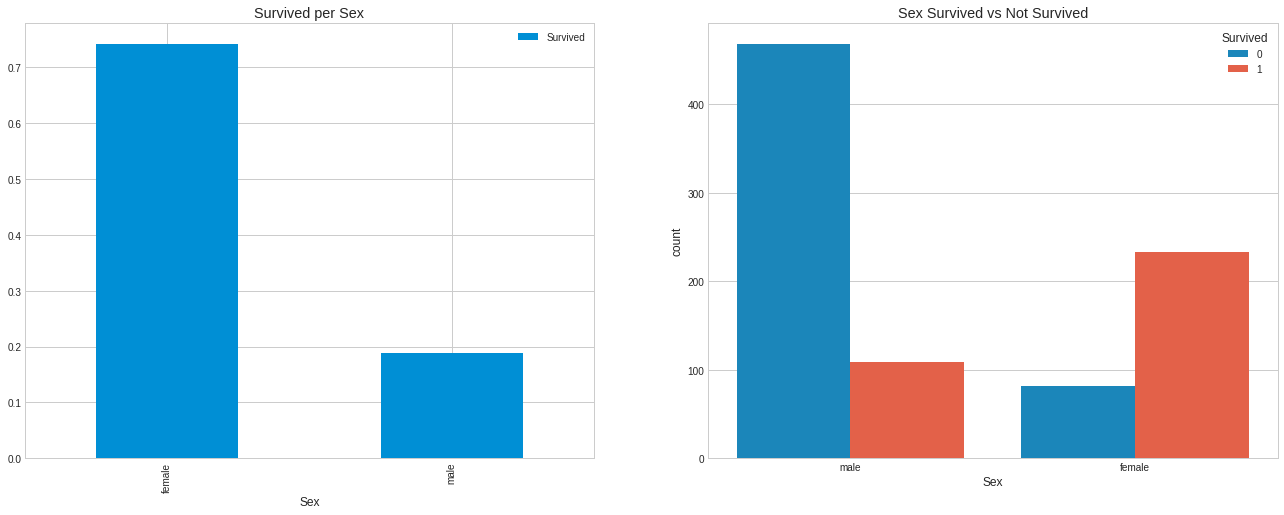

In [0]:
def bag(a,b,c,d):
  f,ax=plt.subplots(1,2,figsize=(20,8))
  train[[a,b]].groupby([a]).mean().plot.bar(ax=ax[0])
  ax[0].set_title(c)
  sns.countplot(a,hue=b,data=train,ax=ax[1])
  ax[1].set_title(d)
  plt.show()

bag('Sex','Survived','Survived per Sex','Sex Survived vs Not Survived')

* 배에 있던 남자의 수는 여자의 수보다 훨씬 많습니다. 여전히 생존 여성 수는 남성 수의 거의 두 배입니다. 선박 여성의 생존율은 약 75 % 인 반면 남성의 생존율은 약 18-19 %입니다.
* The number of men on the ship is much more than the number of women. Still, the number of surviving women is almost twice that of men. The survival rate of ship women is about 75%, while the survival rate of men is about 18-19%.
* 이 것은 남성/여성을 1,2로 나누면 될 것 같은 뻔해 보이는 것이지만 좀 더 새분화하면 좋아 보입니다.
* 예를 들어 아기들은 아기이지, 남자인지 여자인지 구명보트 태울 때 안 물어 볼 것이기 때문입니다.
* 오히려 (불행하게도) 귀족 아기인지 서민의 아기인지는 행과불행을 가를 수 있습니다 ㅠㅠ
* 생존 Pclass별로 성별을 봅니다.
* This seems obvious to divide males / females by 1,2, but it looks good if you break it down a bit.
* For example, babies are just babies and would not be matter whether it is boy or girl.
* (Unfortunately) whether you are a baby in a higher social class or one from a humble family, it might have mattered.
* View gender by survival Pclass.

In [0]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

* 사회는 불공평 했으나 최소한 남자들의 신사도는 있었다고 할 수 있을 것 같습니다.
* The society was unfair but gentlemenship worked there.

#### "Age" 분석
 
* Age는 Continuous한 값입니다.
* 빈칸이 많아서 빈칸처리가 결정적인 역할을 할 것 같습니다.
 
* Age의 최대, 최소, 중간을 보겠습니다.
 
* Age is a continuous value.
 
* Because there are a lot of blanks, blank processing seems to play a decisive role.
 
* Let's take a look at the maximum, minimum, and middle of Age.

In [0]:
print('Oldest Passenger was ',data['Age'].max(),'Years')
print('Youngest Passenger was ',data['Age'].min(),'Years')
print('Average Age on the ship was ',int(data['Age'].mean()),'Years')

Oldest Passenger was  80.0 Years
Youngest Passenger was  0.17 Years
Average Age on the ship was  29 Years


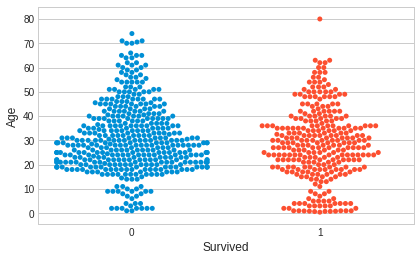

In [0]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel("Survived")
plt.ylabel("Age")
plt.show()

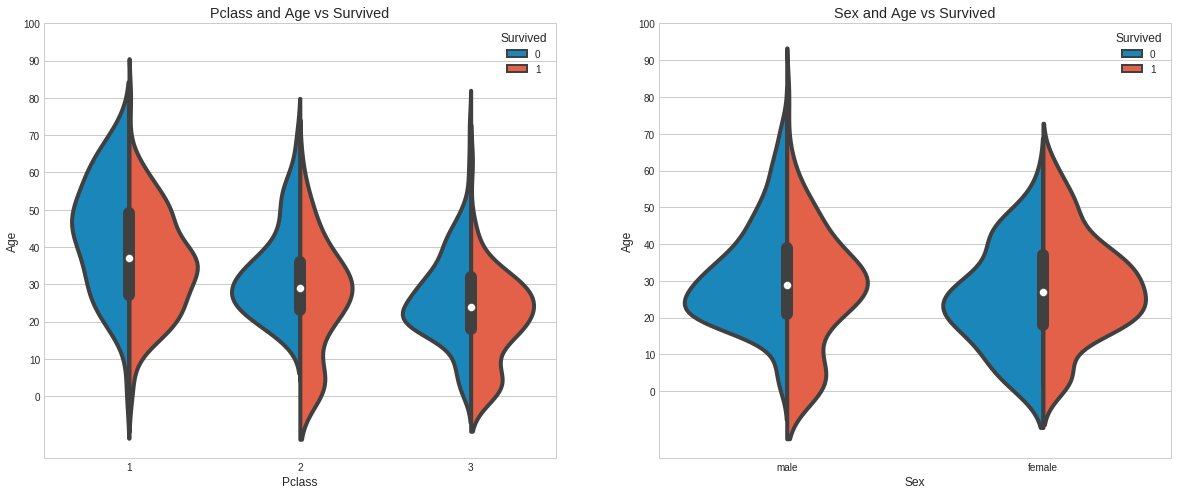

In [0]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

#### 관찰 :

1) Pclass에 따라 어린이 수가 증가하고 10 세 미만의 어린이 (즉, 어린이)의 생존율은 Pclass에 상관없이 양호해 보입니다.

2) Pclass1에서 20-50세의 Passeneger의 생존 가능성은 높고 여성에게는 더 좋습니다.

3) 남성의 경우 생존 확률은 나이가 증가함에 따라 감소합니다.

#### observation :

1) The number of children increases with Pclass, and the survival rate for children under 10 years old (i.e. children) looks good regardless of Pclass.

2) Passeneger, 20-50 years old, in Pclass1 has a higher chance of survival and is better for women.

3) In men, the probability of survival decreases with age.

우선 age의 빈칸 부터 해결 합니다.

First, resolve the issue of null values of age.

앞에서 살펴본 것처럼 Age 항목에는 177 null 값이 있습니다. 이러한 NaN 값을 대체하기 위해 데이터 집합의 평균 수명을 지정할 수 있습니다.

그러나 문제는 평균 연령이 29 세를 4세 아이에게 할당 할 수 없습니다. 승객이 어떤 연령대에 있는지 알 수있는 방법이 있을까요? 이름에서 힌트를 찾아 봅니다.

As we saw earlier, the Age item has a 177 null values. To replace these NaN values, you can specify the average age of the dataset.

But the problem is that the average age is 29 years old can not be assigned this to a kid. Is there any other way ? Look for some hints in their names.

* 그리고 Initial 별 평균 연령을 보고 Age에 적용 시키는 것이 좋을 것 같습니다.
* And it is better to see the average age by Initial and apply it to Age.

In [0]:
temp.groupby('Initial')['Age'].mean() #이니셜 별 평균 연령 체크

Initial
1    44.444444
2    32.275300
3    47.538462
4    18.491141
5    37.005848
6    32.857143
Name: Age, dtype: float64

In [0]:
def newage(k,n):
  temp.loc[(temp.Age.isnull())&(temp.Initial==k),'Age']= n

newage(1,44)
newage(2,32)
newage(3,48)
newage(4,18)
newage(5,374)
newage(6,33)

In [0]:
temp['Age_Range']=pd.qcut(temp['Age'],10)

In [0]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]    0.550000
(16.0, 19.0]     0.461538
(19.0, 23.0]     0.292683
(23.0, 26.0]     0.369863
(26.0, 30.0]     0.400000
(30.0, 32.0]     0.198718
(32.0, 33.0]     0.411765
(33.0, 40.0]     0.445545
(40.0, 50.0]     0.379310
(50.0, 374.0]    0.444444
Name: Survived, dtype: float64

In [0]:
temp['Agroup']=0

temp.loc[temp['Age']<1.0,'Agroup']= 1
temp.loc[(temp['Age']>=1.0)&(temp['Age']<=3.0),'Agroup']= 2
temp.loc[(temp['Age']>3.0)&(temp['Age']<11.0),'Agroup']= 7
temp.loc[(temp['Age']>=11.0)&(temp['Age']<15.0),'Agroup']= 13
temp.loc[(temp['Age']>=15.0)&(temp['Age']<18.0),'Agroup']= 16
temp.loc[(temp['Age']>=18.0)&(temp['Age']<= 20.0),'Agroup']= 18
temp.loc[(temp['Age']> 20.0)&(temp['Age']<=22.0),'Agroup']= 21
temp.loc[(temp['Age']>22.0)&(temp['Age']<=26.0),'Agroup']= 24
temp.loc[(temp['Age']>26.0)&(temp['Age']<=30.0),'Agroup']= 28
temp.loc[(temp['Age']>30.0)&(temp['Age']<=32.0),'Agroup']= 31
temp.loc[(temp['Age']>32.0)&(temp['Age']<=34.0),'Agroup']= 33
temp.loc[(temp['Age']>34.0)&(temp['Age']<=38.0),'Agroup']= 36
temp.loc[(temp['Age']>38.0)&(temp['Age']<=52.0),'Agroup']= 45
temp.loc[(temp['Age']>52.0)&(temp['Age']<=75.0),'Agroup']= 60
temp.loc[temp['Age']>75.0,'Agroup']= 78


In [0]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2,Braund,0,"(19.0, 23.0]",21
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,5,Cumings,1,"(33.0, 40.0]",36
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,5,Futrelle,3,"(33.0, 40.0]",36
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,2,Allen,4,"(33.0, 40.0]",36


In [0]:
survpct('Age')

Age
0.17           NaN
0.33           NaN
0.42      1.000000
0.67      1.000000
0.75      1.000000
            ...   
71.00     0.000000
74.00     0.000000
76.00          NaN
80.00     1.000000
374.00    0.823529
Name: Survived, Length: 99, dtype: float64

* Age는 그룹화 시키면 좋으나 학습을 위해서 그냥 놓아두고, 그룹화 연습은 Fare로 하겠습니다.
* Age should be grouped, but we are focusing on practices not on competition itself, we will just let it be as is and group "fare" later on. 

* 위를 보고 sex를 남,녀, 1세 이하 Baby로 나누겠습니다. 1,2,3번을 주지오
* As we see the above, we divide "sex' into 3 groups, men, women and kids under 13, assigning them 1,2,and 3

In [0]:
temp.loc[(temp['Sex']=='male'),'Sex']= 1
temp.loc[(temp['Sex']=='female'),'Sex']= 2
temp.loc[(temp['Age']< 1),'Sex']= 3

In [0]:
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,Braund,0,"(19.0, 23.0]",21
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,1.0,PC 17599,5,Cumings,1,"(33.0, 40.0]",36
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,1.0,113803,5,Futrelle,3,"(33.0, 40.0]",36
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,Allen,4,"(33.0, 40.0]",36


In [0]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

#### Family or Alone?
* "SibSp" + "Parch" 분석
 
* SibSp - 이 항목은 탑승자가 혼자인지 또는 가족과 함께 있는지를 나타냅니다.
* *Sibling = 형제, 자매, 의붓 형제, 이복 누이
 
* Spouse = 남편, 아내
 
* Parch는 부모와 함께 탔는지를 봅니다.
 
* 이 그룹 둘을 'Alone"그룹과 "Family'그룹으로 나눕니다.
 
#### Family or Alone?
* "SibSp" + "Parch" analysis
 
* SibSp-This item indicates whether the occupant is alone or with a family.
 
* Sibling = brother, sister, stepbrother, half sister
 
* Spouse = husband, wife
 
* Parch sees if she rode with her parents.
 
* Divide these two groups into 'Alone' and 'Family' groups.

In [0]:
temp['Alone']=0
temp.loc[(temp['SibSp']==0)& (temp['Parch']==0),'Alone']= 1

In [0]:
temp['Family']=0

for i in temp:
  temp['Family'] = temp['Parch'] + temp['SibSp'] +1

In [0]:
temp.head(n=10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,Braund,0,"(19.0, 23.0]",21,0,2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,1.0,PC 17599,5,Cumings,1,"(33.0, 40.0]",36,0,2
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24,1,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,1.0,113803,5,Futrelle,3,"(33.0, 40.0]",36,0,2
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,Allen,4,"(33.0, 40.0]",36,1,1
5,32.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,0.0,330877,2,Moran,5,"(30.0, 32.0]",31,1,1
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,0.0,17463,2,McCarthy,6,"(50.0, 374.0]",60,1,1
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,0.0,349909,4,Palsson,7,"(0.169, 16.0]",2,0,5
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,2,0,1.0,347742,5,Johnson,8,"(26.0, 30.0]",28,0,3
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,2,1,1.0,237736,5,Nasser,9,"(0.169, 16.0]",13,0,2


In [0]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

* 크로스 탭은 다시 식구 많은 쪽은 Pclass3에 있음을 보여줍니다.
 
* 여기에서도 결과는 매우 비슷합니다. 부모와 함께 탑승 한 승객은 생존 가능성이 더 높습니다. 그러나 숫자가 올라 갈수록 줄어 듭니다.
 
* 생존 가능성은 배에 1-3 명의 부모가있는 누군가에게 좋습니다. 혼자 또한 생존 가능성이 낮은 것으로 판명되고 가족이 4 명이상 있으면 생존 가능성이 줄어 듭니다. 이는 소수의 가족들이 있는 귀족층이 생존하고, 혼자가 많은 젊은 이들은 양보를 할 수 밖에 없고, 가족이 많은 사람들(특히 귀족이 아닌 3등칸 사람들)은 전원이 타지 못 하면 어느 누구도 탈 수가 없는 비극적인 당시 상황을 보여 줍니다.
 
* Crosstab again shows that many family members are in Pclass3.
 
* The results are very similar here. Passengers boarding with their parents are more likely to survive. But as the number goes up, it decreases.
 
* Survivability is good for anyone with 1-3 parents on the ship. Alone also turns out to be less viable, and having four or more families reduces their chances of survival. This is a tragic time when aristocrats with a few families survive, many young people alone have to make concessions, and many families (especially non-noble people in third place) cannot ride anyone unless they are all burned. Show the situation.

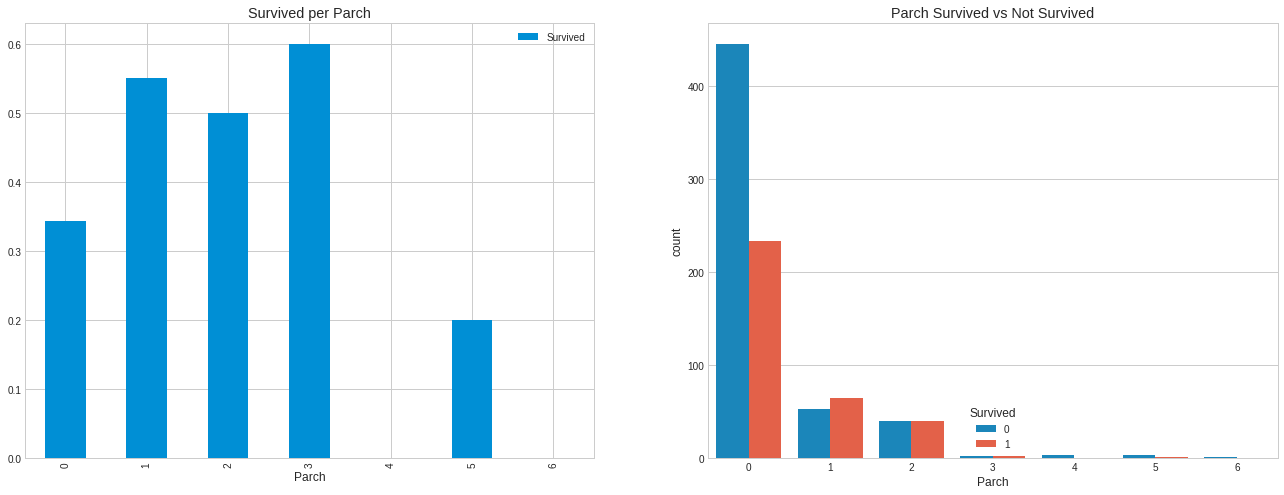

In [0]:
bag('Parch','Survived','Survived per Parch','Parch Survived vs Not Survived')

In [0]:
pd.crosstab([temp.Family,temp.Survived],temp.Pclass,margins=True).style.background_gradient(cmap='summer_r')

#### "Ticket"분석
* Ticket의 형태를 보겠습니다.
* Let's look at the numbers of the ticket.

In [0]:
temp.Ticket.head(n=10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

* 도무지 감이 안 잡히는 배열입니다.
* 빈칸이 없는지 보겠습니다.
 
* It is an array that may not make any sense.
* Let's see if there are any blanks.

In [0]:
temp.Ticket.isnull().any()

False

* 티켓에서 영문있는 것과 숫자만 있는 것을 따봅니다.
* See the tickets with letters or numbers only 

In [0]:
temp['Initick'] = 0
for s in data:
    temp['Initick']=temp.Ticket.str.extract('^([A-Za-z]+)')

temp = temp.reset_index(drop=True)  # to avoid `ValueError: cannot reindex from a duplicate axis`

temp.loc[(temp.Initick.isnull()),'Initick']= temp['Ticket']

temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,2,Braund,0,"(19.0, 23.0]",21,0,2,A
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,1.0,PC 17599,5,Cumings,1,"(33.0, 40.0]",36,0,2,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,1.0,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24,1,1,STON
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,1.0,113803,5,Futrelle,3,"(33.0, 40.0]",36,0,2,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,2,Allen,4,"(33.0, 40.0]",36,1,1,373450


In [0]:
temp['NumTicket'] = 0
for i in temp:
    temp['NumTicket'] = temp['Initick'].factorize()[0]

In [0]:
temp.head(n=15)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,Ticket,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,A/5 21171,2,Braund,0,"(19.0, 23.0]",21,0,2,A,0
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,PC 17599,5,Cumings,1,"(33.0, 40.0]",36,0,2,PC,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,STON/O2. 3101282,4,Heikkinen,2,"(23.0, 26.0]",24,1,1,STON,2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,113803,5,Futrelle,3,"(33.0, 40.0]",36,0,2,113803,3
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,373450,2,Allen,4,"(33.0, 40.0]",36,1,1,373450,4
5,32.0,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,1,0,...,330877,2,Moran,5,"(30.0, 32.0]",31,1,1,330877,5
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,1,0,...,17463,2,McCarthy,6,"(50.0, 374.0]",60,1,1,17463,6
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,1,3,...,349909,4,Palsson,7,"(0.169, 16.0]",2,0,5,349909,7
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,2,0,...,347742,5,Johnson,8,"(26.0, 30.0]",28,0,3,347742,8
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,2,1,...,237736,5,Nasser,9,"(0.169, 16.0]",13,0,2,237736,9


In [0]:
def groupmean(a,b):
  return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

groupmean('NumTicket', 'Survived')

,Survived
NumTicket,
0,0.0689655
1,0.65
2,0.444444
3,0.5
4,0
5,0
6,0
7,0
8,1


#### "Fare" 분석

In [0]:
print('Highest Fare was:',temp['Fare'].max())
print('Lowest Fare was:',temp['Fare'].min())
print('Average Fare was:',temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


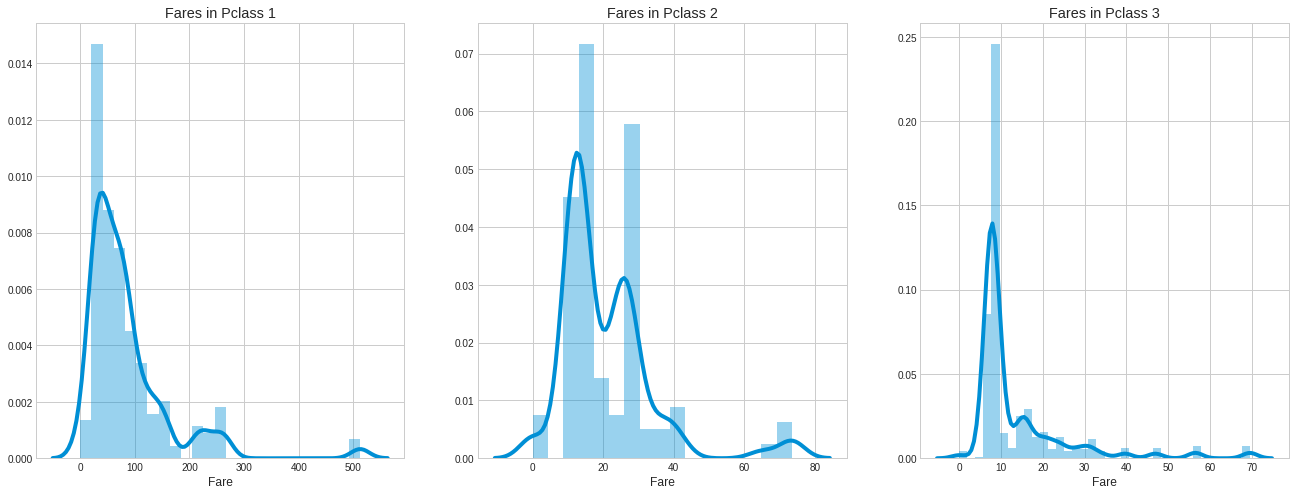

In [0]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

* Pclass1의 승객 요금에는 큰 분포가있는 것으로 보이며 불연속 값으로 변환 할 수 있습니다.
* The passenger fare for Pclass1 seems to have a large distribution and can be converted to discrete values.

* Fare를 그룹으로 나누어 놓겠습니다.
* qcut을 활용하면 원하는 조각으로 데이터를 나누어 줍니다.
 
* I will divide the Fare into groups.
* Use qcut to divide the data into the desired pieces.

In [0]:
temp['Fare_Range']=pd.qcut(train['Fare'],10)
groupmean('Fare_Range', 'Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.92872
"(7.55, 7.854]",7.76849
"(7.854, 8.05]",7.96367
"(8.05, 10.5]",9.52137
"(10.5, 14.454]",12.9402
"(14.454, 21.679]",17.3864
"(21.679, 27.0]",25.4875
"(27.0, 39.688]",32.2822
"(39.688, 77.958]",59.4446


* Fare를 그룹화 시킵니다. Fgroup이라고 이름 짓겠습니다.
* Group Fare with the name of Fgroup

0 and below -> 0

7.125 and below-> 5.0

7.9 and below-> 7.5

8.03 or less-> 8.0

Less than 10.5-> 9.5

Less than 23-> 16.0

27.8 and below-> 25.5

51 and below-> 38

73.5 and below-> 62

Over 73.5-> 100

In [0]:
temp['Fgroup']=0

temp.loc[temp['Fare']<= 0,'Fgroup']=0
temp.loc[(temp['Fare']>0)&(temp['Fare']<=7.125),'Fgroup']= 1
temp.loc[(temp['Fare']>7.125)&(temp['Fare']<=7.9),'Fgroup']= 2
temp.loc[(temp['Fare']>7.9)&(temp['Fare']<=8.03),'Fgroup']= 3
temp.loc[(temp['Fare']>8.03)&(temp['Fare']<10.5),'Fgroup']= 4
temp.loc[(temp['Fare']>=10.5)&(temp['Fare']<23.0),'Fgroup']= 5
temp.loc[(temp['Fare']>=23.0)&(temp['Fare']<=27.8),'Fgroup']= 6
temp.loc[(temp['Fare']>27.8)&(temp['Fare']<=51.0),'Fgroup']= 7
temp.loc[(temp['Fare']>51.0)&(temp['Fare']<=73.5),'Fgroup']= 8
temp.loc[temp['Fare']>73.5,'Fgroup']= 9

temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,Braund,0,"(19.0, 23.0]",21,0,2,A,0,"(-0.001, 7.55]",2
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,Cumings,1,"(33.0, 40.0]",36,0,2,PC,1,"(39.688, 77.958]",8
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,Heikkinen,2,"(23.0, 26.0]",24,1,1,STON,2,"(7.854, 8.05]",3
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,Futrelle,3,"(33.0, 40.0]",36,0,2,113803,3,"(39.688, 77.958]",8
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,Allen,4,"(33.0, 40.0]",36,1,1,373450,4,"(7.854, 8.05]",4


#### "Cabin" 분석
* cabin 의 위치에 따라 달라지는 것이 있는지 보겠습니다.
* Let's see if there is anything that depends on the location of the cabin.

In [0]:
temp.Cabin.value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C22 C26            4
F33                4
                  ..
B36                1
A21                1
B26                1
A7                 1
C128               1
Name: Cabin, Length: 186, dtype: int64

In [0]:
temp.Cabin.isnull().sum()

1014

* 빈칸이 무척 많습니다.
* Lots of null values
* Cabin에 비어 있는 것이 많아 이를 다른 분류로 일단 잡고 기존 것은 이니셜로 분류합니다.
* 빈 것은 X로 구분하려는데 이 또한 1,2,3 Pclass와 연동될 것 같으니 비어있고 1등급은 X, 2등급은 Y, 3등급은 Z로 하겠습니다.
 
* There are so many empty bins in the cabin,
* Existing ones are classified as initials.
* I want to classify the nulls as X, but this is also reclassified by Pclasses, so there will be X, Y and Z

In [0]:

temp['Inicab'] = 0
for i in temp:
    temp['Inicab']=temp.Cabin.str.extract('^([A-Za-z]+)')
    temp.loc[((temp.Cabin.isnull()) & (temp.Pclass.values == 1 )),'Inicab']='X'
    temp.loc[((temp.Cabin.isnull()) & (temp.Pclass.values == 2 )),'Inicab']='Y'
    temp.loc[((temp.Cabin.isnull()) & (temp.Pclass.values == 3 )),'Inicab']='Z'
    
temp.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,1,1,...,0,"(19.0, 23.0]",21,0,2,A,0,"(-0.001, 7.55]",2,Z
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,2,1,...,1,"(33.0, 40.0]",36,0,2,PC,1,"(39.688, 77.958]",8,C
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,2,0,...,2,"(23.0, 26.0]",24,1,1,STON,2,"(7.854, 8.05]",3,Z
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,2,1,...,3,"(33.0, 40.0]",36,0,2,113803,3,"(39.688, 77.958]",8,C
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,1,0,...,4,"(33.0, 40.0]",36,1,1,373450,4,"(7.854, 8.05]",4,Z


In [0]:
for i in temp:
    temp['Inicab'] = temp['Inicab'].factorize()[0]
    
temp[11:20]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,58.0,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,2,0,...,11,"(50.0, 374.0]",60,1,1,113783,11,"(21.679, 27.0]",6,1
12,20.0,NaN,S,8.0500,"Saundercock, Mr. William Henry",0,13,3,1,0,...,12,"(19.0, 23.0]",18,1,1,A,0,"(7.854, 8.05]",4,0
13,39.0,NaN,S,31.2750,"Andersson, Mr. Anders Johan",5,14,3,1,1,...,13,"(33.0, 40.0]",45,0,7,347082,12,"(27.0, 39.688]",7,0
14,14.0,NaN,S,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,2,0,...,14,"(0.169, 16.0]",13,1,1,350406,13,"(7.55, 7.854]",2,0
15,55.0,NaN,S,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,2,0,...,15,"(50.0, 374.0]",60,1,1,248706,14,"(14.454, 21.679]",5,3
16,2.0,NaN,Q,29.1250,"Rice, Master. Eugene",1,17,3,1,4,...,16,"(0.169, 16.0]",2,0,6,382652,15,"(27.0, 39.688]",7,0
17,32.0,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,...,17,"(30.0, 32.0]",31,1,1,244373,16,"(10.5, 14.454]",5,3
18,31.0,NaN,S,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,2,1,...,18,"(30.0, 32.0]",31,0,2,345763,17,"(14.454, 21.679]",5,0
19,374.0,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,2,0,...,19,"(50.0, 374.0]",78,1,1,2649,18,"(-0.001, 7.55]",2,0


#### "Embarked" 분석

In [0]:
pd.crosstab([temp.Embarked,temp.Pclass],[temp.Sex,temp.Survived],margins=True).style.background_gradient(cmap='summer_r')

* Survival rates per Embarked ports
* 승선 장소 별로 생존 확률

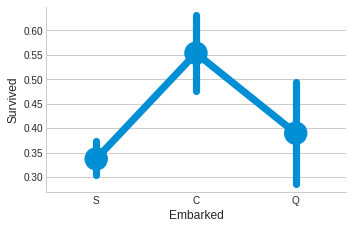

In [0]:
sns.factorplot('Embarked','Survived',data=temp)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

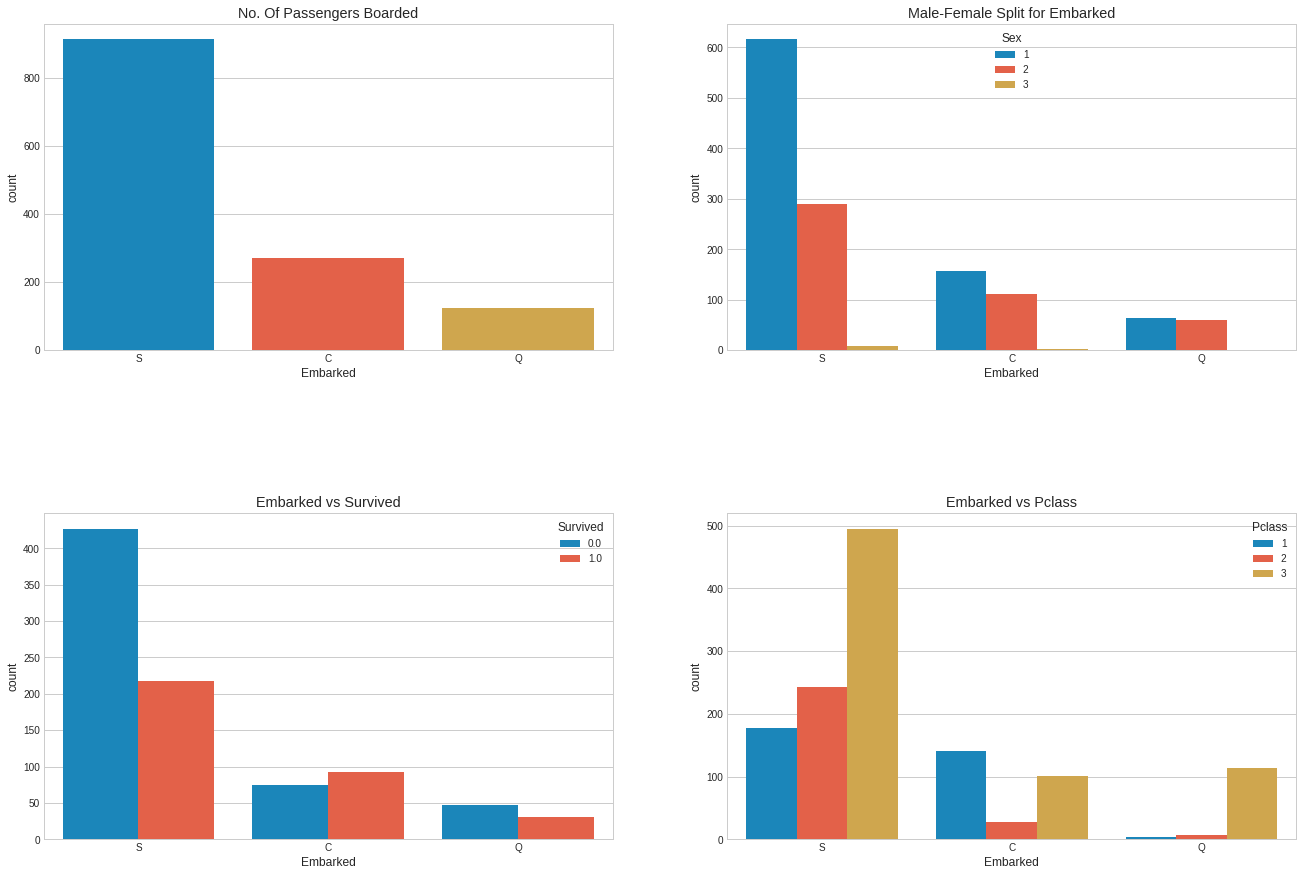

In [0]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=temp,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=temp,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=temp,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=temp,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

1) 포트 C의 생존 가능성은 0.55 정도이며 S는 가장 낮습니다.S에서 탑승 최대. 대다수는 Pclass3

2) C의 승객들은 많은 비율이 살아남았습니다. 그 이유는 Pclass1 및 Pclass2 승객이 많아서 일 것입니다

3) Embark S는 대부분의 부자들이 탑승한 항구지만 생존 가능성은 낮습니다. Pclass3의 승객도 많았습니다.

4) 포트 Q는 승객의 거의 95 %가 Pclass3

observation :

1) Maximum boarding in S. The majority is Pclass3

2) Passengers of C survived a large proportion. The reason would be due to the large number of Pclass1 and Pclass2 passengers

3) Embark S is the port where most rich people board, but it is unlikely to survive. Lots of passengers in Pclass3.

4) Port Q has almost 95% of passengers Pclass3

* 빈칸이 두개 있는데 보겠습니다.
* Let us see 2 null values

In [0]:
temp.loc[(temp.Embarked.isnull())]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(33.0, 40.0]",36,1,1,113572,51,"(77.958, 512.329]",9,8
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(50.0, 374.0]",60,1,1,113572,51,"(77.958, 512.329]",9,8


* 두 사람의 티켓 번호가 같습니다.
* 혹시 같은 티켓 번호가 있는 다른 사람이 있는지 봅니다.
 
* Two people have the same ticket number.
* See if anyone else has the same ticket number.

In [0]:
temp.loc[(temp.Ticket == '113572')]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(33.0, 40.0]",36,1,1,113572,51,"(77.958, 512.329]",9,8
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(50.0, 374.0]",60,1,1,113572,51,"(77.958, 512.329]",9,8


* 가장 비슷한 번호를 찾아 보겠습니다.
* Let's find the similar numbers.

In [0]:
temp.sort_values(['Ticket'], ascending = True)[55:70]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,65.0,B30,C,61.9792,"Ostby, Mr. Engelhart Cornelius",1,55,1,1,0,...,51,"(50.0, 374.0]",60,0,2,113509,46,"(39.688, 77.958]",8,8
351,32.0,C128,S,35.0000,"Williams-Lambert, Mr. Fletcher Fellows",0,352,1,1,0,...,17,"(30.0, 32.0]",31,1,1,113510,232,"(27.0, 39.688]",7,1
252,62.0,C87,S,26.5500,"Stead, Mr. William Thomas",0,253,1,1,0,...,217,"(50.0, 374.0]",60,1,1,113514,171,"(21.679, 27.0]",6,1
829,62.0,B28,NaN,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,2,0,...,616,"(50.0, 374.0]",60,1,1,113572,51,"(77.958, 512.329]",9,8
61,38.0,B28,NaN,80.0000,"Icard, Miss. Amelie",0,62,1,2,0,...,58,"(33.0, 40.0]",36,1,1,113572,51,"(77.958, 512.329]",9,8
802,11.0,B96 B98,S,120.0000,"Carter, Master. William Thornton II",2,803,1,1,1,...,215,"(0.169, 16.0]",13,0,4,113760,253,"(77.958, 512.329]",9,8
390,36.0,B96 B98,S,120.0000,"Carter, Mr. William Ernest",2,391,1,1,1,...,215,"(33.0, 40.0]",36,0,4,113760,253,"(77.958, 512.329]",9,8
435,14.0,B96 B98,S,120.0000,"Carter, Miss. Lucile Polk",2,436,1,2,1,...,215,"(0.169, 16.0]",13,0,4,113760,253,"(77.958, 512.329]",9,8
763,36.0,B96 B98,S,120.0000,"Carter, Mrs. William Ernest (Lucile Polk)",2,764,1,2,1,...,215,"(33.0, 40.0]",36,0,4,113760,253,"(77.958, 512.329]",9,8
185,32.0,A32,S,50.0000,"Rood, Mr. Hugh Roscoe",0,186,1,1,0,...,162,"(30.0, 32.0]",31,1,1,113767,127,"(39.688, 77.958]",7,6


* 앞 뒤로 모두 S이고 Pclass도 모두 1인 것으로 봐서 S일 가능성이 큽니다.
* It is most likely that it is S because both front and back are S and Pclass is all 1.

In [0]:
temp.loc[(temp.Embarked.isnull()),'Embarked']='S'

In [0]:
temp.loc[(temp.Embarked.isnull())]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [0]:
for i in temp:
    temp['Embarked'] = temp['Embarked'].factorize()[0]
    
temp[11:20]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,...,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,58.0,C103,0,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,2,0,...,11,"(50.0, 374.0]",60,1,1,113783,11,"(21.679, 27.0]",6,1
12,20.0,NaN,0,8.0500,"Saundercock, Mr. William Henry",0,13,3,1,0,...,12,"(19.0, 23.0]",18,1,1,A,0,"(7.854, 8.05]",4,0
13,39.0,NaN,0,31.2750,"Andersson, Mr. Anders Johan",5,14,3,1,1,...,13,"(33.0, 40.0]",45,0,7,347082,12,"(27.0, 39.688]",7,0
14,14.0,NaN,0,7.8542,"Vestrom, Miss. Hulda Amanda Adolfina",0,15,3,2,0,...,14,"(0.169, 16.0]",13,1,1,350406,13,"(7.55, 7.854]",2,0
15,55.0,NaN,0,16.0000,"Hewlett, Mrs. (Mary D Kingcome)",0,16,2,2,0,...,15,"(50.0, 374.0]",60,1,1,248706,14,"(14.454, 21.679]",5,3
16,2.0,NaN,2,29.1250,"Rice, Master. Eugene",1,17,3,1,4,...,16,"(0.169, 16.0]",2,0,6,382652,15,"(27.0, 39.688]",7,0
17,32.0,NaN,0,13.0000,"Williams, Mr. Charles Eugene",0,18,2,1,0,...,17,"(30.0, 32.0]",31,1,1,244373,16,"(10.5, 14.454]",5,3
18,31.0,NaN,0,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,2,1,...,18,"(30.0, 32.0]",31,0,2,345763,17,"(14.454, 21.679]",5,0
19,374.0,NaN,1,7.2250,"Masselmani, Mrs. Fatima",0,20,3,2,0,...,19,"(50.0, 374.0]",78,1,1,2649,18,"(-0.001, 7.55]",2,0


## 6. Feature Engineering

### 6.1 Turning string to numbers

* Already done above

### 6.2 Adding Features

* Some done above

* 그래도 몇 개 만들어 볼까요? But why don't we try making some more

* Priority - (1) Nobles (2) Women in Pclass 1 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2  (5) Women in Pclass 3
* FH - Female Higher Survival Group
* MH - Male Higher Survival Group
* FL - Female Lower Surival Group
* ML - Male Lower Survival Group

* And I will keep making new ones until all the data are either over 80% or le

### Priority - (1) Nobles (2) Women in Pclass 1 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2  (5) Women in Pclass 2 (6) Higher Fare

In [0]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [0]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [0]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [0]:
survpct('Age')

Age
0.17           NaN
0.33           NaN
0.42      1.000000
0.67      1.000000
0.75      1.000000
            ...   
71.00     0.000000
74.00     0.000000
76.00          NaN
80.00     1.000000
374.00    0.823529
Name: Survived, Length: 99, dtype: float64

In [0]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [0]:
temp['Priority'] = 0
temp.loc[(temp['Initial'] == 6), 'Priority'] = 1
temp.loc[(temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority'] = 2
temp.loc[(temp['Age'] < 1),'Priority'] = 3
temp.loc[(temp['Pclass'] == 1) & (temp['Age'] <= 17), 'Priority'] = 4
temp.loc[(temp['Pclass'] == 2) & (temp['Age'] <= 17), 'Priority'] = 5
temp.loc[(temp['Pclass'] == 2) & (temp['Sex'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [0]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [0]:
temp.Priority.value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

In [0]:
temp.columns


Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Initial', 'LastName',
       'NumName', 'Age_Range', 'Agroup', 'Alone', 'Family', 'Initick',
       'NumTicket', 'Fare_Range', 'Fgroup', 'Inicab', 'Priority'],
      dtype='object')

In [0]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [0]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [0]:
temp['FH'] = 0
temp.loc[(temp['Sex'] == 1), 'FH'] = 0
temp.loc[(temp['Sex'] == 2), 'FH'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 2), 'FH'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 3), 'FH'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 4), 'FH'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'FH'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'FH'] = 6
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH'] = 7
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH'] = 8

In [0]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [0]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

In [0]:
temp['MH'] = 0
temp.loc[(temp['Sex'] == 2), 'MH'] = 0
temp.loc[(temp['Sex'] == 1), 'MH'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 2), 'MH'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 3), 'MH'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 4), 'MH'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH'] = 6
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH'] = 7
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH'] = 8

In [0]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [0]:
temp.MH.value_counts()

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64

In [0]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6


In [0]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [0]:
temp.FL.value_counts()

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64

In [0]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [0]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [0]:
temp.ML.value_counts()

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64

### Deciding final features

In [0]:
temp['F1'] = temp['Priority']

In [0]:
temp['F2'] = temp['FH']

In [0]:
temp['F3'] = temp['MH']

In [0]:
temp['F4'] = temp['FL']

In [0]:
temp['F5'] = temp['ML']

In [0]:
temp['F6'] = temp['Initial']

In [0]:
temp['F7'] = temp['Fgroup']

In [0]:
temp['F8'] = temp['NumName']

In [0]:
temp['F9'] = temp['NumTicket']

In [0]:
temp['F10'] = temp['Family']

* Now we are ready to move on.
* 이제 다음 단계로 갑니다.

* Let's make two new dataframes, one for label encoding, the other for one-hot-encoding
* 두개의 새로운 데이터 프레임을 만듭니다. 하나는 레이블 인코딩 다른 하나는 원핫 인코딩 (둘이 꼭 필요한 것이 아니라 연습이나 두 가지 방 법 모두 사용해봄)

* 대표적인 인코딩에 Label Encoding이 있는데 이는 각 항목의 값을 서열화 시켜 주~욱 줄세운 것이라 생각하시면 됩니다.
* 그 외에 자주쓰는 One Hot Encoding 같은 경우 열 내에서의 항목을 나누어서 (열이 주~욱 늘어나며) 이를 0이냐 1이냐로 구분해 놓은 것입니다.
* A typical encoding is Label Encoding, which can be considered to be a very good order of the values of each item.
* In addition, the one-of-a-kind One Hot Encoding is divided into 0 or 1 by dividing the items in the column (they increase in number).

* 다시 말씀 드려서 레이블 인코딩은 줄을 세워서 번호를 부여하는 것이고, 원핫인코딩은 긴가 아닌가 두 가지입니다.
* label encoding assign ordinal numbers while one hot encoding gives 1 or 0

* For example 16 year old is number 5 and 17 year old is number 6 ..that's the way it is for the label encoding
* 예를들어 나이별로 줄을 세워 너는 5번, 너는 6번이런식이 레이블 인코딩이고

* If you are 16 yes or no , 17 yes or no...that's one hot encoding
* 16살이야? 1, 16살 아냐 0 ..그 다음 17살이야? 1 17살 아냐 0 ..이런 식으라 열의 수가 무지하게 늘어납니다.

In [0]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

새로운 Data Frame을 만듭니다.

In [0]:
dfl= pd.DataFrame() # for label encoding

In [0]:
def newdf(a):
    dfl[a] = temp[a]

newdf('F1')
newdf('F2')
newdf('F3')
newdf('F4')
newdf('F5')
newdf('F6')
newdf('F7')
newdf('F8')
newdf('F9')
newdf('F10')

dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0,0,2,0,3,2,2,0,0,2
1,2,8,0,2,0,5,8,1,1,2
2,0,7,0,6,0,4,3,2,2,1
3,2,8,0,2,0,5,8,3,3,2
4,0,0,1,0,6,2,4,4,4,1


In [0]:
dfh = dfl.copy()

dfh.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0,0,2,0,3,2,2,0,0,2
1,2,8,0,2,0,5,8,1,1,2
2,0,7,0,6,0,4,3,2,2,1
3,2,8,0,2,0,5,8,3,3,2
4,0,0,1,0,6,2,4,4,4,1


In [0]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
                          
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0,0,2,0,3,1,2,0,0,1
1,2,5,0,2,0,4,8,1,1,1
2,0,4,0,5,0,3,3,2,2,0
3,2,5,0,2,0,4,8,3,3,1
4,0,0,1,0,6,1,4,4,4,0


In [0]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns=one_hot_cols)

dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,...,F9_724,F10_1,F10_2,F10_3,F10_4,F10_5,F10_6,F10_7,F10_8,F10_11
0,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


## Working with Label Encoded One First

# Making ML models / 머신러닝 모델 만들기

* 자, 이제 머신 러닝 모델을 만들어 보지요.
* 우선 인코딩한 파일을 train과 test로 아까 구분해 놓은 행으로 쪼갭니다

* Now let's create a machine learning model.
* First, split the encoded file into the lines that were previously separated by train and test.

In [0]:
train = dfl_enc[:ntrain]
test = dfl_enc[ntrain:]

이를 트레인과 테스트 데이터플레임의 x축으로 정의합니다.

In [0]:
X_test = test
X_train = train

* StandardScaler의 기본 개념은 분포가 평균값 0이고 표준 편차가 1이되도록 데이터를 변환한다는 것입니다. 그리고 스케일러를 쓰지 않으면 아래에서 알고리즘을 쓸 때 에러가 발생하기도 합니다.
* 참고 MinMaxScaler: 각 항목을 지정된 범위로 조정하여 변환합니다.
* maxAbsScaler: 각 항목을 최대절대값으로 조정하여 변환합니다.
* StandardScaler 평균을 제거하고 단위 분산으로 스케일링하여 항목을 표준화, 즉 모든 항목들이 같은 스케일을 가지는 것입니다.
* fit과 transform 메서드는 fit 메서드로 데이터 변환을 학습하고, transform 메서드로 실제 데이터의 스케일을 조정합니다.
* 이때, fit 메서드는 학습용 데이터에만 적용해야 합니다. 그 후, transform 메서드를 학습용 데이터와 테스트 데이터에 적용합니다.

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
X_train

array([[-0.54272037, -0.67078064, -0.25603893, ..., -1.49955607,
        -1.16909881,  0.07254763],
       [ 0.21879751,  1.58626448, -0.89506048, ..., -1.49431077,
        -1.16297848,  0.07254763],
       [-0.54272037,  1.13485546, -0.89506048, ..., -1.48906546,
        -1.15685816, -0.580381  ],
       ...,
       [-0.54272037,  1.58626448, -0.89506048, ...,  1.60041776,
        -0.74067607,  1.37840488],
       [-0.54272037, -0.67078064,  1.34151492, ...,  1.90989062,
         2.07467333, -0.580381  ],
       [-0.54272037, -0.67078064, -0.57554971, ...,  1.91513592,
         2.08079365, -0.580381  ]])

### 1단계 모델을 만들어 봅니다.
* 자 이제는 11개의 classifier로 모델을 돌려 보겠습니다.

In [0]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

* 클래시파이어는 특정 데이터 포인트에 (범주) 클래스 레이블을 할당하는 데 사용되는 이산 값 함수입니다.
* Random Forest -결정 트리(decision tree)는 말그대로 결정을 내리기 위해 사용하는 트리로, 결정 과정을 간단한 문제들로 이루어진 계층 구조로 나눈다. 간단한 문제에 대해서는 매개변수(예: 모든 노드의 테스트 매개변수, 종단 노드에서 매개변수 등)를 사용자가 직접 설정할 수 있지만, 보다 복잡한 문제의 경우 학습 데이터로부터 트리 구조와 매개변수를 모두 자동으로 학습한다. 랜덤 포레스트의 가장 큰 특징은 랜덤성(randomness)에 의해 트리들이 서로 조금씩 다른 특성을 갖는다는 점이다. 이 특성은 각 트리들의 예측(prediction)들이 비상관화(decorrelation) 되게하며, 결과적으로 일반화(generalization) 성능을 향상시킨다. 또한, 랜덤화(randomization)는 포레스트가 노이즈가 포함된 데이터에 대해서도 강인하게 만들어 준다. 랜덤화는 각 트리들의 훈련 과정에서 진행되며, 랜덤 학습 데이터 추출 방법을 이용한 앙상블 학습법인 배깅(bagging)과 랜덤 노드 최적화(randomized node optimization)가 자주 사용된다. 이 두 가지 방법은 서로 동시에 사용되어 랜덤화 특성을 더욱 증진 시킬 수 있다.
* randome_state =1로 하는 것은 계속 같은 결과로 나오게/ 0으로 하면 매번 달라짐
* K-neighbors는 쉽게 표현하면 K개의 이웃을 찾습니다.이웃 점의 인접 지표와 거리를 반환합니다.
* Logistic Regression - 종속 변수와 독립 변수 사이의 관계는 미래 예측 모델에 사용될 구체적인 함수로 표현되며 독립적인 변수의 선형 조합을 사용하여 사건의 가능성을 예측하기 위해 통계 기법입니다. 즉 동전의 앞뒷면, 되냐 안 되는냐 이런 종류에 주로 사용됩니다. 회귀란 말이 생경하기 때문에 간단히 말씀 드리면 예를 들어 타이타닉에서 1등석 여성부터 구명보트에 먼저 태웠다면 룰에 따라 1등석 여성은 모두 살아야 하는데, 현실 세계에서는 꼭 케이트윈슬렛처럼 디카프리오 땜에 도로 배로 돌아오거나 아니면 스스로 희생을 택하는 분들 같은 평균값을 벗어나는 일들이 생기기 때문에 본래 모델과의 차이가 발생하게 되어 있습니다. 이러한 차들이 평균적인 수치로 돌아오게 만드는 것이 회귀 모델이라고 생각하시면 됩니다. 설명이 부족하나 초보자들은 그 정도만 이해하시고 나중에 좀 더 이해하시는 것으로 하고 넘어 갑니다.
* XGB는 의사결정 트리를 많이 만들어 이의 예측값을 더해가며 결정하는데 이를 위해 또 잔 하이퍼파라미터를 설정하게 하여 좀 더 성능을 높이는 부스팅 알고리즘입니다.
* 참고로 부스팅은 분류문제에서 잘 못 분류된 것을 재분류하는 것을 반복하여 예측모델을 강화 시키는 것입니다.
* 또한 배깅이란 것은 여러번의 복원 샘플링을 통해 예측 모델의 분산을 줄여 모델을 강화시키는 방법입니다.
* 또한 보팅이란 말을 많이 들으실텐데 보팅은 하드보팅과 소프트보팅이 있습니다. 하드보팅은 말 그대로 투표한데로 결과를 내는 것이고, 소프트보팅은 가중치를 조절하여 유연하게 투표하는 방식입니다.
* GradientBoosting - 랜덤 포리스트가 많은 트리를 만들어 내서 해결하는 방법을 택한다면 GradientBoosting은 앞에 트리의 오차를 줄여가며 보완하는 방식으로 트리를 만들어 가는 방식이라고 생각하시면 됩니다.
* SVㅡ - Support Vector machine은 분류 할 때 무우 자르듯이 자르는 것이 아니라 마진의 경계선을 주어 제한 조건을 추가한 것이라 생각하시면 됩니다. 남북한의 명확한 경계선 대신 비무장 지대 생각하시면 어떨지....
* ExtraTrees - 랜덤포리스트에서 트리를 무작위로 분할하여 더 많은 트리를 만든 방식이라 생각하시면 됩니다.
* adaboost 알고리즘은 Adaptive Boost의 준말로 데이터를 대충 분류해서 돌린 후 여기서 분류하지 못 하는 오류들에 가중치를 주어 정확도를 높이는 것을 계속 반복하여 신뢰도를 높인다고 생각하시면 됩니다.
* Gaussian Naive Bayes 알고리즘은 특수한 유형의 NB 알고리즘입니다. 기능에 연속 값이있을 때 특히 사용됩니다. 또한 모든 기능이 가우스 분포, 즉 정규 분포를 따르고 있다고 가정합니다.Naive Bayes는 특성들 사이의 독립을 가정하는 베이즈 정리를 적용한 확률 분류 방법이다. 베이즈정리 - 조건부 확률
* Gaussian process는 함수의 확률적 분포를 modeling하는데 쓰이며.각자의 joint Guassian distribution을 가진 Gaussian 랜덤 변수의 집합이다. 좀 더 쉽게 말할 수 있는 것을 생각해 보겠습니다.
* 크로스 밸리데이션은 결과 값을 이리 돌려보고 저리 돌려 보고해서 한 면에서 나온 결과 값이 아니라 다양한 경우를 경험하게 한 결과 값을 보여주는 과정이라고 생각하시면 됩니다.
* 위의 for 루프는 11 가지 모델의 교차 검증 된 점수를 list 'score'로 넣습니다. 이제 이 데이터를 먼저 테이블로 만들고 이 그래프를 통해 결과를 알아 봅니다

In [0]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,SVC,0.829435
1,Gaussian Process,0.827124
2,K Nearest Neighbour,0.817099
3,Gradient Boosting,0.817062
4,Logistic Regression,0.809359
5,XGBoost,0.809234
6,Random Forest,0.808136
7,Gaussian Naive Bayes,0.795775
8,Extra Trees,0.794614
9,AdaBoost,0.794563


'score'란 'accuracy'를 말합니다. 즉 위는 우리 모델을 가지고 알려진 트레인의 정확성을 본 것입니다.

(0.7, 0.84)

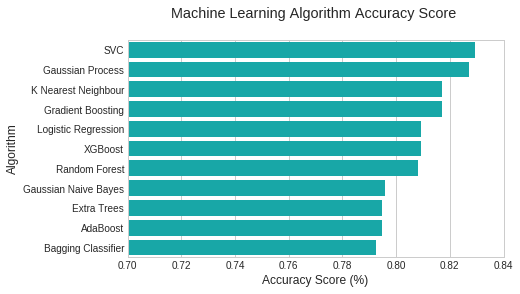

In [0]:
# Plot results
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.70, 0.84)

In [0]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=5, aspect=1.5)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # 각 그래프마다 새로운 타이틀을 줍니다.
        ax.set(title=title)
    # 그래프를 바로 세워 봅니다.
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

그래서 이미 답이 알려져 있는 트레인 파일을 해보니 ...아 이정도 정확성이 있었고, 각 수치들과 결과를 비교해보니 어느 항목이 정답에 아주 정학한 인덱스가 되고 어느 항목은 별로 관계 없더라...이런 것이지요

In [0]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

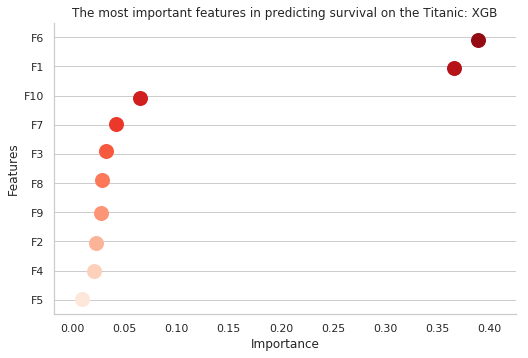

In [0]:
# 그래프 제목
titles = ['The most important features in predicting survival on the Titanic: XGB']

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
# 아래는 Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고 Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

In [0]:
importance.head()

,Features,Importance
5,F6,1.341949
0,F1,0.529077
6,F7,0.360507
7,F8,0.153398
2,F3,0.062508


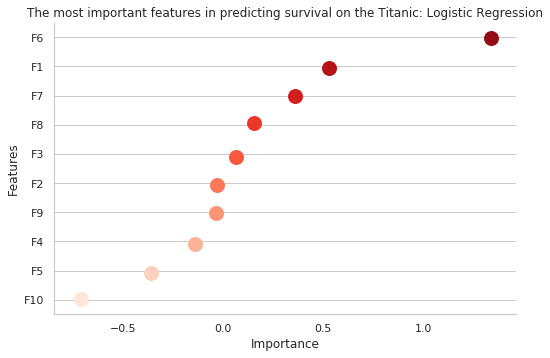

In [0]:
# 그래프 타이틀
titles = ['The most important features in predicting survival on the Titanic: Logistic Regression']

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

### 항목 고르기

In [0]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# 보기
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,F6,0.493123,0.388733,0.105962,0.111209,0.06,0.231805
1,F8,0.113827,0.028420,0.204645,0.219519,0.42,0.197282
2,F1,0.157216,0.365658,0.099692,0.130465,0.08,0.166606
3,F9,0.085886,0.027079,0.202214,0.180280,0.26,0.151092
4,F7,0.064963,0.041454,0.057256,0.078094,0.08,0.064353
5,F10,0.065306,0.064996,0.054907,0.040070,0.08,0.061056
6,F4,0.003515,0.020312,0.074366,0.100447,0.00,0.039728
7,F5,0.009688,0.009438,0.105162,0.062405,0.00,0.037339
8,F3,0.005402,0.031790,0.083937,0.007787,0.00,0.025783
9,F2,0.001076,0.022121,0.011859,0.069725,0.02,0.024956


In [0]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

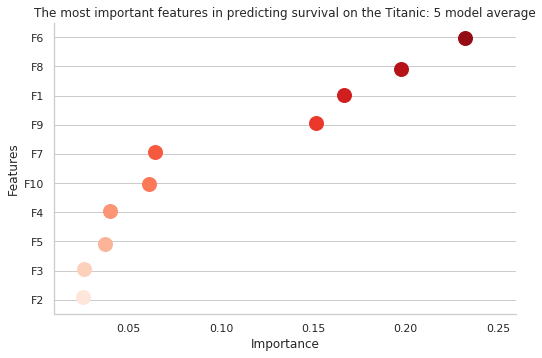

In [0]:
# 그래프 타이틀
titles = ['The most important features in predicting survival on the Titanic: 5 model average']

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# 약한 놈 탈락, 본래 좀 탈락시키는데 하나만 탈락안 시키고 보겠습니다.
train = train.drop(['F2'], axis=1)
test = test.drop(['F2'], axis=1)

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 모델 재 트레이닝

In [0]:
# 모델 사용
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v2.append(acc.mean())

In [0]:
# 테이블 만들어서 보기
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,SVC,0.829435,0.826076
1,Gaussian Process,0.827124,0.823766
2,XGBoost,0.809234,0.817100
3,K Nearest Neighbour,0.817099,0.812592
4,Random Forest,0.808136,0.810359
5,Gradient Boosting,0.817062,0.810333
6,Logistic Regression,0.809359,0.808248
7,Bagging Classifier,0.792317,0.804778
8,AdaBoost,0.794563,0.801292
9,Gaussian Naive Bayes,0.795775,0.794677


(0.75, 0.85)

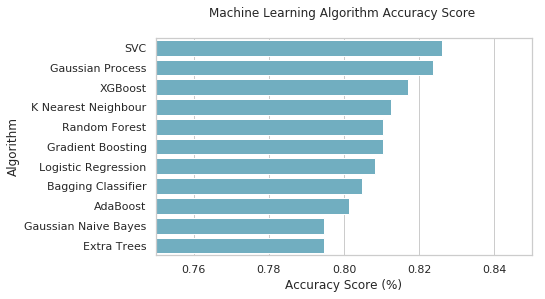

In [0]:
# 결과
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.75, 0.85)

## 여기까지 보고 이제는 One-hot-encoding한 것으로 해보겠습니다.

In [0]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [0]:
X_test = test
X_train = train


In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# Prepare lists
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores = []

# Sequentially fit and cross validate all models
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores.append(acc.mean())

In [0]:
# 결과 테이블을 만듭니다.
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Score': scores})

result_df = results.sort_values(by='Score', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Score
0,XGBoost,0.847325
1,Bagging Classifier,0.843991
2,Random Forest,0.837287
3,Extra Trees,0.836151
4,Gradient Boosting,0.834990
5,Logistic Regression,0.829422
6,AdaBoost,0.826063
7,SVC,0.822705
8,Gaussian Process,0.694950
9,K Nearest Neighbour,0.623910


(0.8, 0.84)

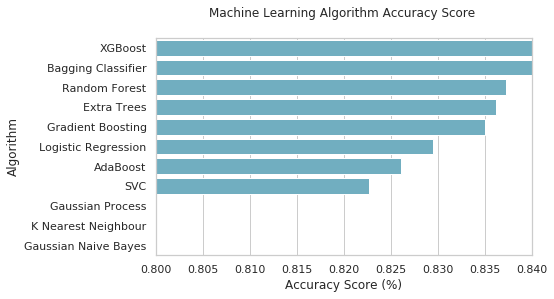

In [0]:
# Plot results
sns.barplot(x='Score', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.80, 0.84)

In [0]:
# 중요도를 보는 함수를 만듭니다.
def importance_plotting(data, x, y, palette, title):
    sns.set(style="whitegrid")
    ft = sns.PairGrid(data, y_vars=y, x_vars=x, size=5, aspect=1.5)
    ft.map(sns.stripplot, orient='h', palette=palette, edgecolor="black", size=15)
    
    for ax, title in zip(ft.axes.flat, titles):
    # 각 그래프마다 새로운 타이틀을 줍니다.
        ax.set(title=title)
    # 그래프를 바로 세워 봅니다.
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)
    plt.show()

In [0]:
# 데이터 프레임에 항목 중요도를 넣습니다.
fi = {'Features':train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

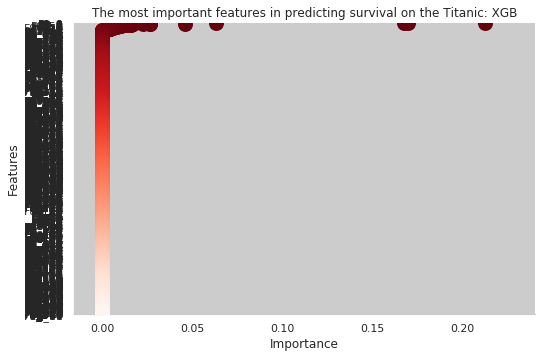

In [0]:
# 그래프 제목
titles = ['The most important features in predicting survival on the Titanic: XGB']

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# 중요도를 데이터프레임에 넣습니다. Logistic regression에서는 중요도보다 coefficients를 사용합니다. 
# 아래는 Features라는 열에 트레인의 열들의 이름을 리스트로 만들어서 넣고 Importance에는 Logistic regression에는 coefficient를 바꾸어 넣어라는 넘파이 명령입니다.(즉 가로를 세로로)
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)


importance.head()

,Features,Importance
38,F6_4,0.934258
14,F3_0,0.670147
28,F5_0,0.670147
39,F6_5,0.471097
5,F1_5,0.401599


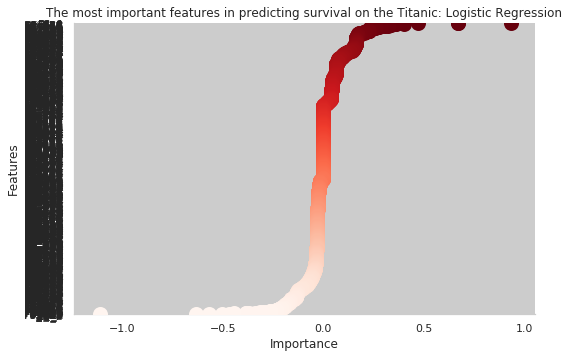

In [0]:
# 그래프 타이틀
titles = ['The most important features in predicting survival on the Titanic: Logistic Regression']

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# 보기
importances

,Feature,gbc importance,xgb importance,ran importance,ext importance,ada importance,Average
0,F1_0,0.309461,0.212659,0.059087,0.068790,0.02,0.133999
1,F2_0,0.000293,0.167470,0.078184,0.073464,0.00,0.063882
2,F6_2,0.113650,0.063507,0.067736,0.025951,0.04,0.062169
3,F5_0,0.175912,0.000000,0.035810,0.052114,0.02,0.056767
4,F3_0,0.041507,0.169821,0.007317,0.012308,0.00,0.046191
...,...,...,...,...,...,...,...
1633,F8_700,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1634,F8_701,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1635,F8_702,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1636,F8_703,0.000000,0.000000,0.000000,0.000000,0.00,0.000000


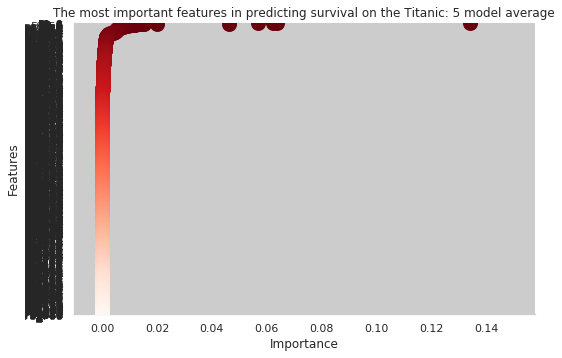

In [0]:
# 중요도를 다시 데이터 프레임에 넣기
fi = {'Features':importances['Feature'], 'Importance':importances['Average']}
importance = pd.DataFrame(fi, index=None).sort_values('Importance', ascending=False)

# 그래프 타이틀
titles = ['The most important features in predicting survival on the Titanic: 5 model average']

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', 'Reds_r', titles)

In [0]:
# 약한 놈 탈락, 본래 좀 탈락시키는데 탈락 안 시키고 보겠습니다.
# train = train.drop(['F4'], axis=1)
# test = test.drop(['F4'], axis=1)

# 모델의 변수를 다시 정의하고
X_train = train
X_test = test

# 바꿉니다.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
#  모델 재 트레이닝
# 모델 사용
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v2 = []

# Fit & cross validate
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v2.append(acc.mean())

In [0]:
# 테이블 만들어서 보기
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2})

result_df = results.sort_values(by='Score with feature selection', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection
0,XGBoost,0.847325,0.847325
1,Bagging Classifier,0.843991,0.841719
2,Extra Trees,0.836151,0.838436
3,Random Forest,0.837287,0.837287
4,Gradient Boosting,0.834990,0.833879
5,Logistic Regression,0.829422,0.829422
6,SVC,0.822705,0.822705
7,AdaBoost,0.826063,0.814840
8,Gaussian Process,0.694950,0.694950
9,K Nearest Neighbour,0.623910,0.623910


(0.75, 0.85)

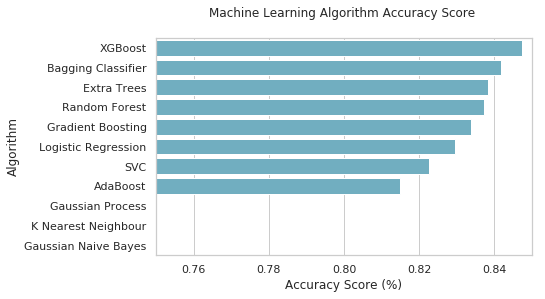

In [0]:
# 결과
sns.barplot(x='Score with feature selection', y = 'Model', data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.75, 0.85)

## 하이퍼파라미터 튜닝

### SVC
* Scikit-Learn에서는 3가지 모형 최적화 도구를 지원하는데 validation_curve/ GridSearchCV/ ParameterGrid이다
* fit 메소드를 호출하면 grid search가 자동으로 여러개의 내부 모형을 생성하고 이를 모두 실행시켜서 최적 파라미터를 찾는다.

* bestscore는 최고 점수이고 best estimator는 최고 점수를 낸 파라미터를 가진 모형
* c값과 gamma값은 10의 배수로 일반적으로 한다.
* 감마 매개 변수는 단일 학습 예제의 영향이 도달하는 정도를 정의하며 낮은 값은 'far'를, 높은 값은 'close'를 나타냅니다. 감마 매개 변수는 서포트 벡터로 모델에 의해 선택된 샘플의 영향 반경의 역으로 볼 수 있습니다.
* C 매개 변수는 의사 결정 표면의 단순성에 대한 훈련 예제의 오 분류를 제거합니다. C가 낮을수록 결정 표면이 매끄럽고 높은 C는 모델이 더 많은 샘플을 서포트 벡터로 자유롭게 선택할 수 있도록하여 모든 학습 예제를 올바르게 분류하는 것을 목표로합니다.
* Verbose는 불리안 값으로 True로 넣으면 꼬치 꼬치 다 알려주는데, 대신 시간이 좀 더 오래 걸립니다.
* cv =5는 5 fold로 교차 검증한다는 뜻입니다.

In [0]:
# 파라미터 서치
Cs = [0.001, 0.01, 0.1, 1, 5, 10, 15, 20, 50, 100]
gammas = [0.001, 0.01, 0.1, 1]

# 파라미터 그리드 셋팅
hyperparams = {'C': Cs, 'gamma' : gammas}

# 교차검증
gd=GridSearchCV(estimator = SVC(probability=True), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 22.4min finished


0.8170594837261503
SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


### Gradient Boosting Classifier
* learning_rate는 각 트리의 기여를 줄이는 역할을 합니다.
* n_estimator는 각 경우의 트리 숫자입니다.

In [0]:
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [100, 250, 500, 750, 1000, 1250, 1500]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 55.7min finished


0.8439955106621774
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Logistic Regression
* Penalty - L1 을 사용하는 회귀 모델을 Lasso Regression이라고하고 L2를 사용하는 모델을 Ridge Regression이라고합니다. 이 둘의 주요 차이점은 페널티입니다. 릿지 회귀는 손실 함수에 페널티 항으로 계수의 "제곱 크기"를 추가합니다. L2-norm이 오차를 제곱하기 때문에 (오류> 1 인 경우 로트가 증가 함) 모델은 L1-norm보다 훨씬 큰 오차 (e vs e ^ 2)를 보게되므로 훨씬 더 민감합니다. 따라서 오류를 최소화하기 위해 모델을 조정해줍니다.
* C는 estimator 입니다. logspace 1차원 10개 배열로 0에서 4까지를 estimator로 놓은 것입니다.

In [0]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd=GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   45.7s finished


0.8417508417508418
LogisticRegression(C=59.94842503189409, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


### XGBoost Step 1

In [0]:
learning_rate = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 25, 50, 75, 100, 250, 500, 750, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd=GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed: 63.1min finished


0.8406285072951739
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### XGB Step 2

In [0]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  2.8min finished


0.8316498316498316
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=6,
              min_child_weight=2, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### XGB Step 3


In [0]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   12.5s finished


0.8103254769921436
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### XGB Step 4

In [0]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  2.9min finished


0.8294051627384961
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.65, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### XGB Step 5

In [0]:

reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.0001, n_estimators=10, max_depth=3, 
                                          min_child_weight=1, gamma=0, subsample=0.6, colsample_bytree=0.9),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.2s finished


0.8069584736251403
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, gamma=0,
              learning_rate=0.0001, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


### Gaussian Process

In [0]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd=GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  6.4min finished


0.6992143658810326
GaussianProcessClassifier(copy_X_train=True, kernel=None, max_iter_predict=1,
                          multi_class='one_vs_rest', n_jobs=None,
                          n_restarts_optimizer=0, optimizer='fmin_l_bfgs_b',
                          random_state=None, warm_start=True)


### Adaboost

In [0]:
n_estimators = [10, 25, 50, 75, 100, 125, 150, 200]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  5.6min finished


0.8406285072951739
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=125, random_state=None)


### KNN

In [0]:
n_neighbors = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size = [1, 2, 3, 4, 5, 10, 15, 20, 25, 30]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size, 
               'n_neighbors': n_neighbors}

gd=GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

# Fitting model and return results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


0.7474747474747475
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='distance')


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 30.6min finished


### Random Forest

In [0]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.6554433221099888
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  8.0min finished


### Extra Trees

In [0]:

n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
0.6408529741863075
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=3, max_features=3, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=2, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:  7.6min finished


### Bagging Classifier

In [0]:

n_estimators = [10, 15, 20, 25, 50, 75, 100, 150]
max_samples = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 50]
max_features = [1, 3, 5, 7]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy")

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_estimator_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 352 candidates, totalling 1760 fits
0.6531986531986532
BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=5, max_samples=5, n_estimators=25, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


[Parallel(n_jobs=1)]: Done 1760 out of 1760 | elapsed:  3.0min finished


### Gaussian Naive Bayes - 파라미터 튜닝이 안 되는 모델이니 기존 점수데로

### 모델 재 트레이닝

In [0]:

# 튜닝 모델 시작
# sample을 split하는 것은 전체데이터 80%를 트레인셋에 20%는 테스트셋에 줌  
ran = RandomForestClassifier(n_estimators=25,
                             max_depth=3, 
                             max_features=3,
                             min_samples_leaf=2, 
                             min_samples_split=8,  
                             random_state=1)

knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=1, 
                           n_neighbors=5, 
                           weights='uniform')

log = LogisticRegression(C=2.7825594022071245,
                         penalty='l2')

xgb = XGBClassifier(learning_rate=0.0001, 
                    n_estimators=10,
                    random_state=1)

gbc = GradientBoostingClassifier(learning_rate=0.0005,
                                 n_estimators=1250,
                                 random_state=1)

svc = SVC(probability=True)

ext = ExtraTreesClassifier(max_depth=None, 
                           max_features=3,
                           min_samples_leaf=2, 
                           min_samples_split=8,
                           n_estimators=10,
                           random_state=1)

ada = AdaBoostClassifier(learning_rate=0.1, 
                         n_estimators=50,
                         random_state=1)

gpc = GaussianProcessClassifier()

bag = BaggingClassifier(random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
scores_v3 = []

# Fit & 교차 검증
for mod in models:
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores_v3.append(acc.mean())

In [0]:

# 랭킹 테이블 생성
results = pd.DataFrame({
    'Model': ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier'],
    'Original Score': scores,
    'Score with feature selection': scores_v2,
    'Score with tuned parameters': scores_v3})

result_df = results.sort_values(by='Score with tuned parameters', ascending=False).reset_index(drop=True)
result_df.head(11)

,Model,Original Score,Score with feature selection,Score with tuned parameters
0,Bagging Classifier,0.843991,0.841719,0.841719
1,Logistic Regression,0.829422,0.829422,0.824940
2,SVC,0.822705,0.822705,0.822705
3,XGBoost,0.847325,0.847325,0.817137
4,AdaBoost,0.826063,0.814840,0.812617
5,Gradient Boosting,0.834990,0.833879,0.800358
6,Gaussian Process,0.694950,0.694950,0.694950
7,K Nearest Neighbour,0.623910,0.623910,0.623910
8,Random Forest,0.837287,0.837287,0.616170
9,Extra Trees,0.836151,0.838436,0.616170


(0.75, 0.86)

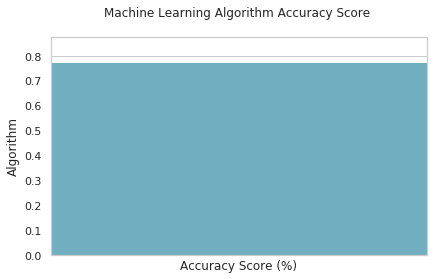

In [0]:

# 결과
sns.barplot(x=None, y = None, data = result_df, color = 'c')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')
plt.xlim(0.75, 0.86)

## Voting

In [0]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv = 10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean()*100))

Hard voting on test set score mean: 81.49


In [0]:
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv = 10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean()*100))

Soft voting on test set score mean: 84.74


## 마지막 모델 예측

In [0]:
# Final predictions
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passId), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission.csv', header = True, index = False)

### 제출

In [0]:
# And we finally make a submission 그리고 우리는 제출을 합니다.
# Please make sure you "commit" (It take a few minutes) / commit버턴을 누르시는 것을 잊지 마세요 (몇 분 걸립니다)
# And then you will see the submission file on the top right hand side at Data>Output>Kaggle/working / 그럼 우측 상단 데이터 아웃풋에서 제출용 결과물이 나올 것입니다.